## Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x).

It is mostly used for finding out the relationship between variables and forecasting

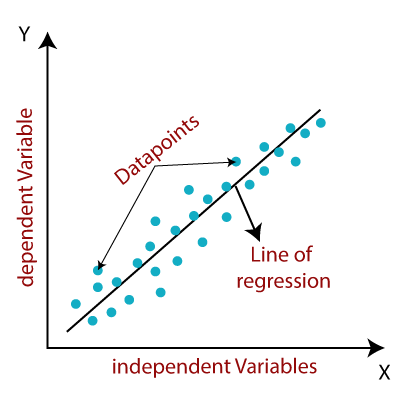

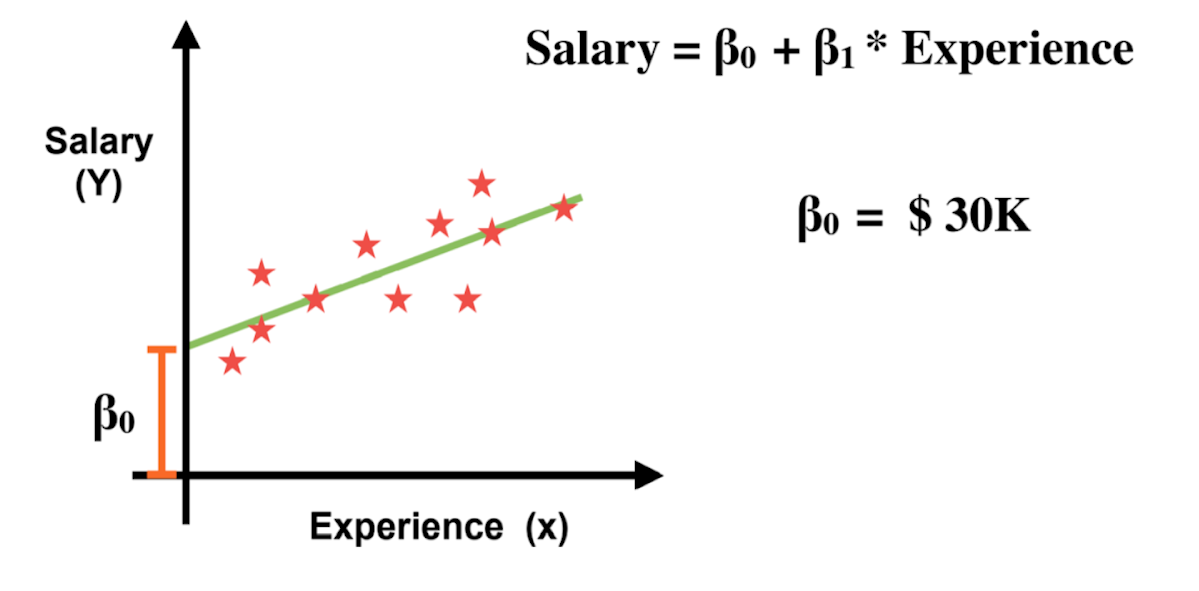

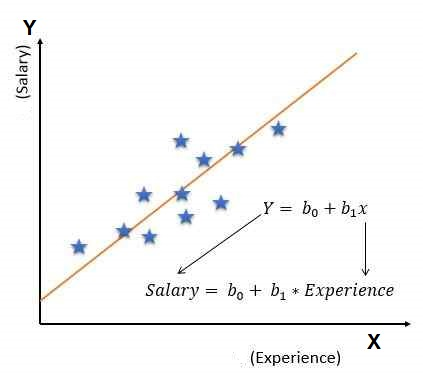

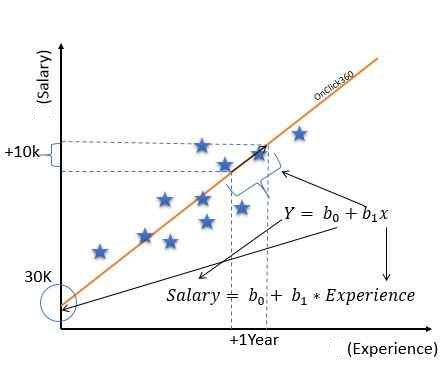

In the figure above, X (input) is the work experience and Y (output) is the salary of a person. The regression line is the best fit line for our model.

Linear regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.


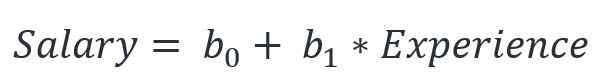

### Salary = 30 + 10 * Experience

b0 = 30

b1= 10

**Suppose if a person have 15 Years of Experience then what the salary will be ?**

Salary= 30 + 10 * 15

Salary = 180k

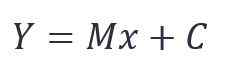

#### M is a Coefficient of an independent variable and the slop of the line.

C is the y-intercept of the line.

While training the model we are given :

    x: input training data (univariate – one input variable(parameter))

    y: labels to data (supervised learning)

When training the model – it fits the best line to predict the value of y for a given value of x. The model gets the best regression fit line by finding the best c and M values.

    c: intercept

    M: coefficient of x

Once we find the best c and M values, we get the best fit line. So when we are finally using our model for prediction, it will predict the value of y for the input value of x.

In [ ]:
# Scaling only goes where in the ALGO- DISTANCE are Calculated

# 0.2, 0.4  --0.2   --[0:1] By 'Min Max Scaler' / 
#   -- them normaly distributed where mean close to-> 0, variance close to -> 1 - 'Standard Scaler'

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(data = boston.data , columns = boston.feature_names)

In [6]:
df.head(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [7]:
df['MEDV']=boston.target
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [8]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
x=df.drop(['MEDV'],axis=1)
y=df['MEDV']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [35]:
y_train.head(2)

5      28.7
116    21.2
Name: MEDV, dtype: float64

In [34]:
x_train.head(2)

model.fit(x_train,y_train)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04


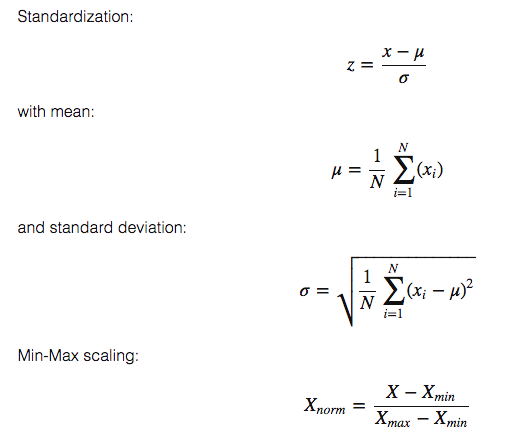

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=StandardScaler()

# mc = MinMaxScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [15]:
x_train[:2]

array([[-0.41425879, -0.50512499, -1.29214218, -0.28154625, -0.85108479,
         0.14526384, -0.365584  ,  1.08162833, -0.74617905, -1.11279004,
         0.18727079,  0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, -0.28154625, -0.08796708,
        -0.20840082,  0.13394078, -0.48787608, -0.39846419,  0.15008778,
        -0.21208981,  0.3870674 , -0.05366252]])

In [16]:
x_test[:2]

array([[-0.406801  , -0.50512499, -1.02225586, -0.28154625, -0.40521827,
         0.12577051,  0.55383118, -0.52734802, -0.51436915, -0.66777595,
        -0.74457062,  0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068,  3.55181427, -0.94540271,
         0.60196466, -1.29947815,  0.14683092, -0.6302741 , -0.92035152,
        -0.30083661,  0.42854113, -1.25185755]])

In [17]:
model=LinearRegression()

In [18]:
model.fit(x_train,y_train)  # This is where model does training part i.e intercept, coeffs.

LinearRegression()

In [19]:
model.intercept_

23.01581920903955

In [24]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [22]:
model.coef_

array([-1.10834602,  0.80843998,  0.34313466,  0.81386426, -1.79804295,
        2.913858  , -0.29893918, -2.94251148,  2.09419303, -1.44706731,
       -2.05232232,  1.02375187, -3.88579002])

In [96]:
coeff_df=pd.DataFrame(model.coef_,index=x.columns)
coeff_df.sort_values(0,ascending=False)

,0
RM,4.057199
CHAS,3.119835
RAD,0.242727
INDUS,0.049523
ZN,0.035809
B,0.011794
TAX,-0.008702
AGE,-0.010821
CRIM,-0.133470
LSTAT,-0.547113


In [77]:
model.score(x_train,y_train)  # by default - giving you Rsquared score

0.7434997532004697

In [25]:
model.score(x_test,y_test) # by default - giving you Rsquared score

0.7112260057484932

In [52]:
# y_pred=model.predict(x_test)#predicting house price when Features(X_test) are given to the model
y_pred[:12]

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049])

In [53]:
y_test[:12]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
76     20.0
316    17.8
140    14.0
471    19.6
500    16.8
218    21.5
9      18.9
Name: MEDV, dtype: float64

In [57]:
import sklearn
import numpy as np
print('mean_absolute_error (MAE) ', sklearn.metrics.mean_absolute_error(y_test,y_pred))
print('mean_squared_error (MSE) ' ,sklearn.metrics.mean_squared_error(y_test,y_pred))
print('Root mean_squared_error (RMSE)', np.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred)))
print('rsquared ',sklearn.metrics.r2_score(y_test,y_pred))


# mean_absolute_error (MAE)- low value is desired
# mean_squared_error (MSE) - low value is desired
# Root mean_squared_error (RMSE)  - low value is desired
# rsquared (R2 SCORE) -- Higher value is desired

mean_absolute_error (MAE)  3.1627098714574053
mean_squared_error (MSE)  21.51744423117721
Root mean_squared_error (RMSE) 4.6386899261728205
rsquared  0.7112260057484932


In [ ]:
# Bonus Question

# model.fit(x_train['median_income'], y_train)
# income_pred=model.predict(x_test['median_income'])
# print('Income rsquared ',sklearn.metrics.r2_score(y_test,income_pred))